In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/clean/imdb_clean.csv").sort_values("GrossRevenue", ascending=False)[:1000]

## FOR ALL THE CHARTS, I CAN INCREASE THE LABEL FONT SIZE

[Text(0.5, 0, 'Title'),
 Text(0, 0.5, 'Domestic Gross Revenue (in Millions of $)')]

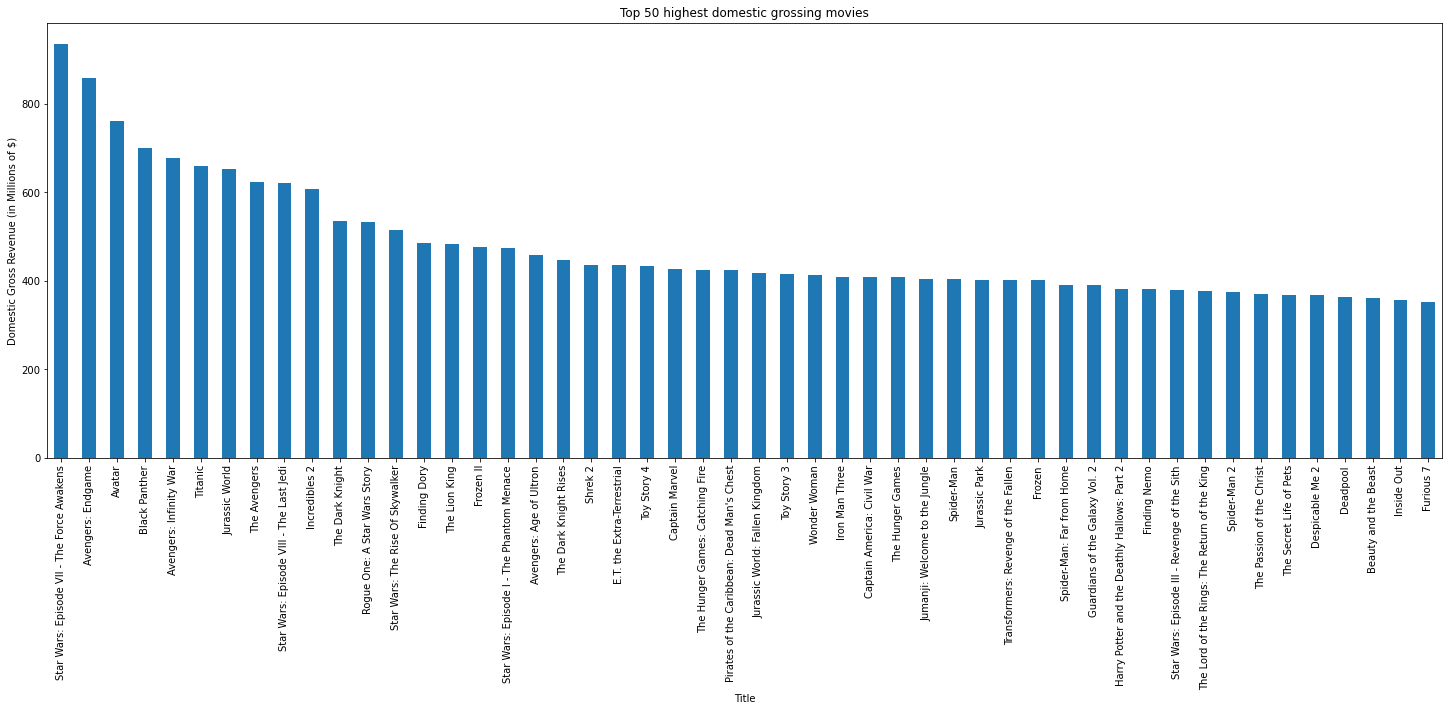

In [3]:
# Show the top 50 movies and explain they are not accounted for inflation and are on domestic revenue terms only

plot1 = (
    df.groupby("Title")["GrossRevenue"]
    .mean()
    .sort_values(ascending=False)[:50]
    .plot.bar(figsize=(25, 8), title="Top 50 highest domestic grossing movies")
)
plot1.set(xlabel="Title", ylabel="Domestic Gross Revenue (in Millions of $)")

[Text(0.5, 0, 'Release Year'),
 Text(0, 0.5, 'Domestic Gross Revenue (in Millions of $)'),
 Text(0.5, 1.0, 'Relation between release year and domestic revenue')]

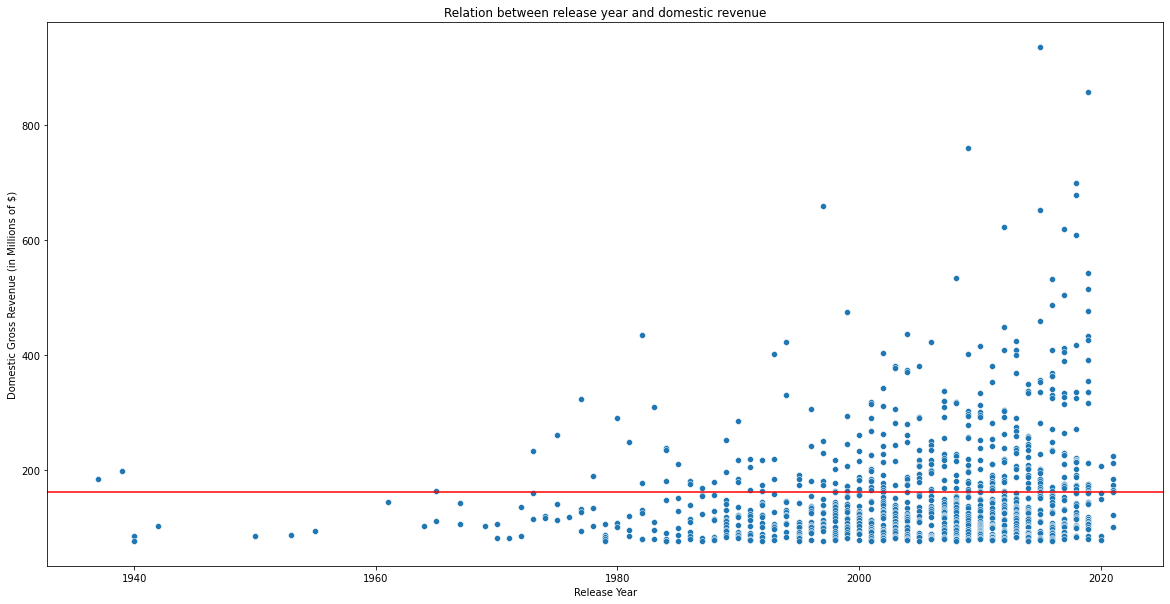

In [4]:
# What makes them a lot of money? Is it the Year, the ratings or the genre? 
# (Show regression "imdb_ols_regression.csv" - maybe I'll put it in here")
# Start showing relationship between Average Revenue and Release Year
# The lines divide the graph into four quadrants, anything above the horizontal line are movies done better than the average
# I can also put one for Release Year if needed

plt.figure(figsize=(20, 10))
plot2 = sns.scatterplot(data=df, x="ReleaseYear", y="GrossRevenue")
plot2.axhline(np.mean(df["GrossRevenue"]), color="red")
plot2.set(xlabel="Release Year", ylabel="Domestic Gross Revenue (in Millions of $)",
         title="Relation between release year and domestic revenue")

[Text(0.5, 0, 'IMDB Rating'),
 Text(0, 0.5, 'Domestic Gross Revenue (in Millions of $)'),
 Text(0.5, 1.0, 'Relation between IMDB rating and domestic revenue')]

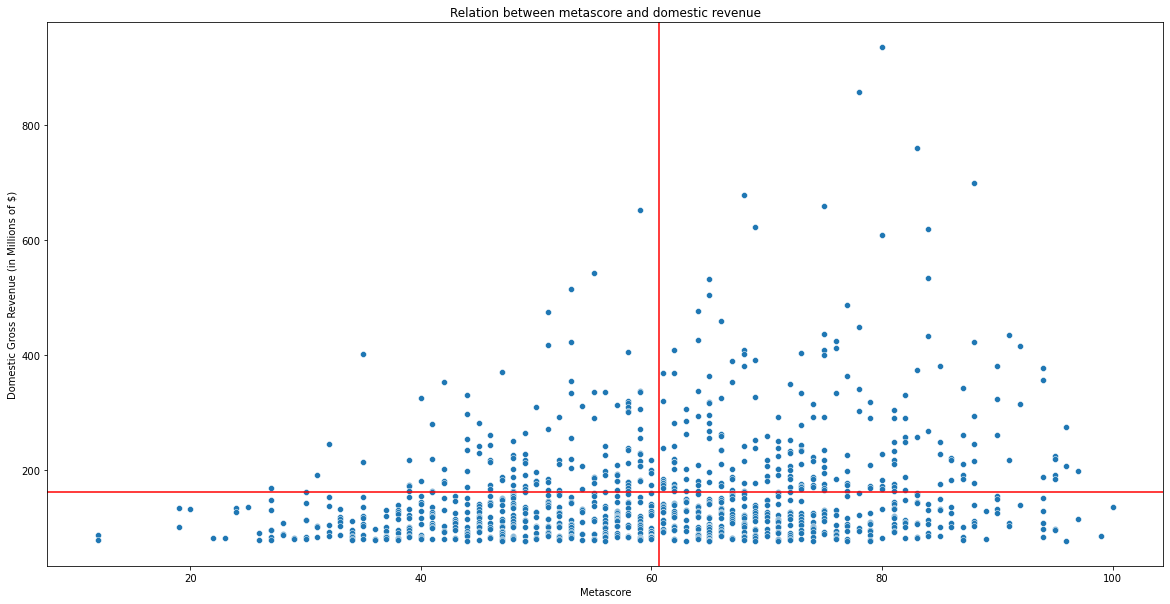

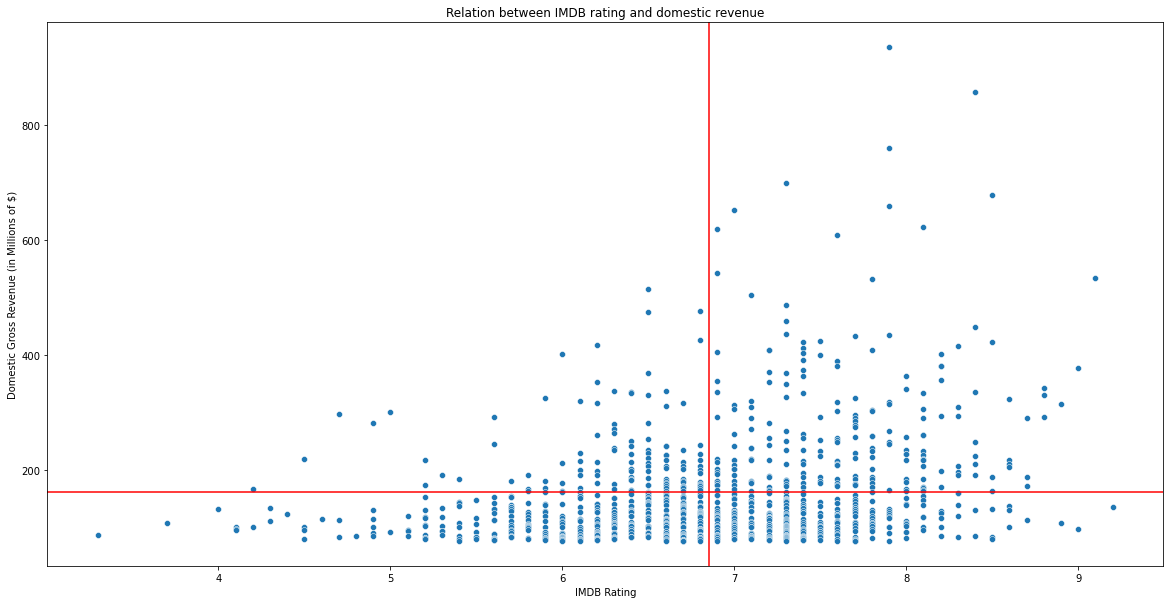

In [5]:
# Show relation with Metascore and revenue. (can remove lines if you want)


plt.figure(figsize=(20, 10))
plot3 = sns.scatterplot(data=df, x="Metascore", y="GrossRevenue")
plot3.axhline(np.mean(df["GrossRevenue"]), color="red")
plot3.axvline(np.mean(df["Metascore"]), color="red")
plot3.set(xlabel="Metascore", ylabel="Domestic Gross Revenue (in Millions of $)",
         title="Relation between metascore and domestic revenue")


# Show relation with IMDB score and revenue. (can remove lines if you want)


plt.figure(figsize=(20, 10))
plot4 = sns.scatterplot(data=df, x="IMDBRating", y="GrossRevenue")
plot4.axhline(np.mean(df["GrossRevenue"]), color="red")
plot4.axvline(np.mean(df["IMDBRating"]), color="red")
plot4.set(xlabel="IMDB Rating", ylabel="Domestic Gross Revenue (in Millions of $)",
         title="Relation between IMDB rating and domestic revenue")

[Text(0.5, 0, 'IMDB Rating'),
 Text(0, 0.5, 'Metascore'),
 Text(0.5, 1.0, 'Relation between IMDB rating and metascore')]

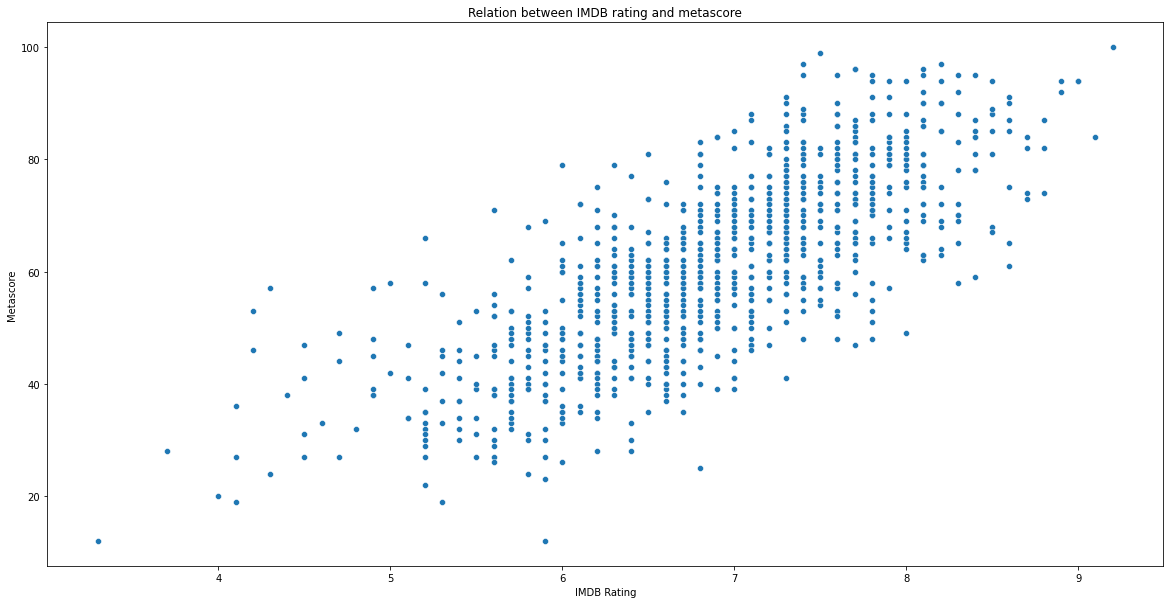

In [6]:
# If we leave both we need to argue that they are very closely related, but the regressions shows they are both significant.
# That could be, because Metascore is done by certified critics, while IMDB doesn't require more than a simple account
# Show the regression "imdb_ols_regression.csv" again 

# Can remove this chart if too long
plt.figure(figsize=(20, 10))
plot5 = sns.scatterplot(data=df, x="IMDBRating", y="Metascore")
plot5.set(xlabel="IMDB Rating", ylabel="Metascore",
         title="Relation between IMDB rating and metascore")

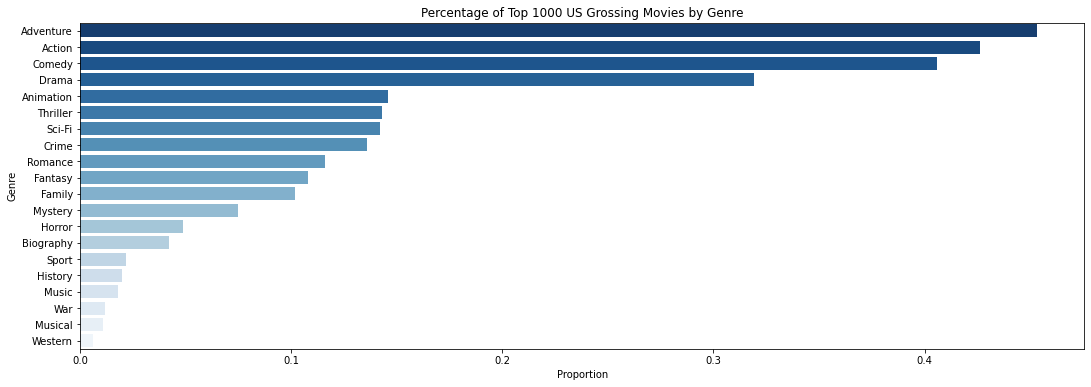

In [7]:
# Maybe is genres that affect the revenue, so that is the distribution of genres

genre_props = (
    df[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
    .mean()
    .reset_index()
    .rename(columns = {"index": "Genre", 0: "Proportion"})
    .sort_values("Proportion", ascending = False)
)

plt.figure(figsize=(18,6))
plot6 = sns.barplot(data=genre_props,
            x = "Proportion",
            y = "Genre",
           orient = "h",
           palette = "Blues_r").set(title="Percentage of Top 1000 US Grossing Movies by Genre")

[Text(0.5, 0, 'Release Year'),
 Text(0, 0.5, 'Domestic Gross Revenue (in Millions of $)'),
 Text(0.5, 1.0, 'Relation between release year and domestic revenue with Adventure movies highlighted')]

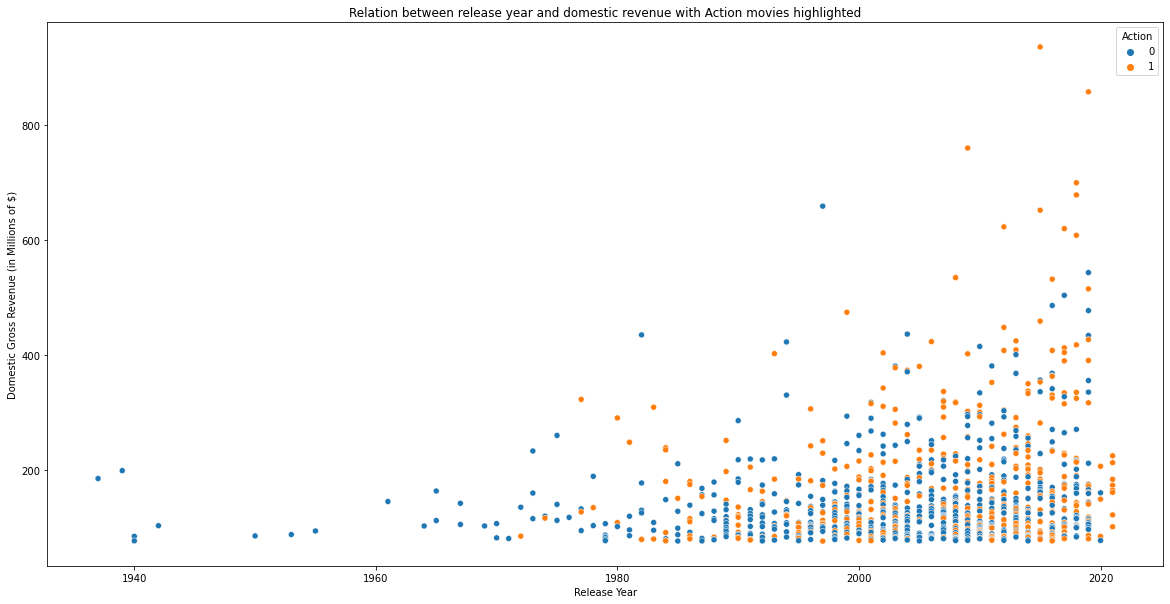

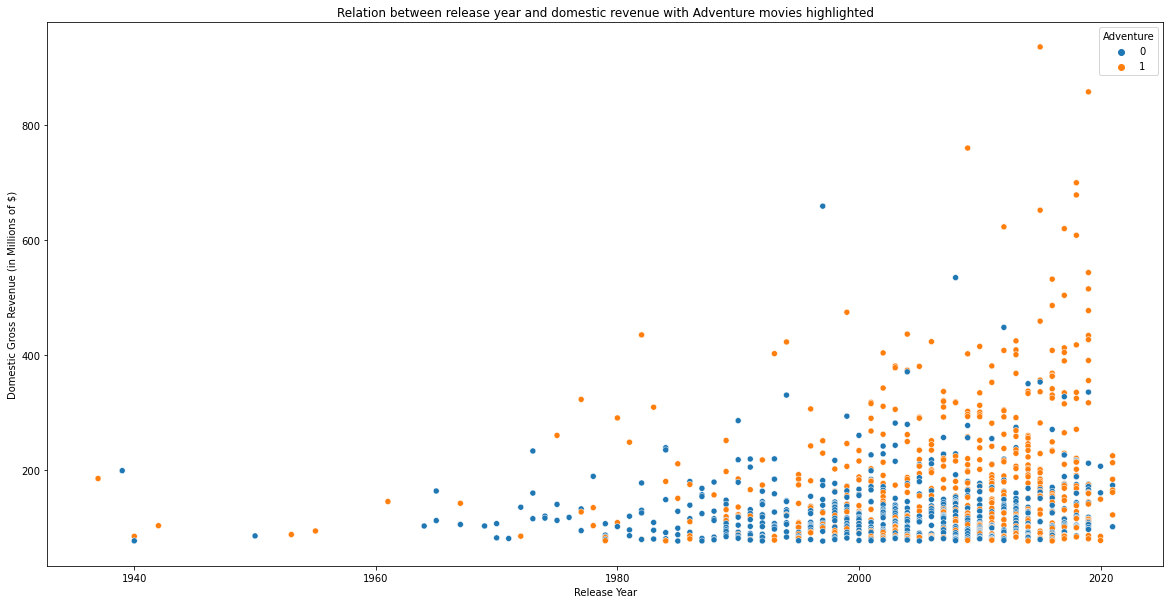

In [16]:
# The proportion shows that actually there is a higher than 100% percentage of movies accounted for.
# The problem is that IMDB has on average three genres for movies, if we look at each genre separated, we would be counting
# them more than once. We can clearly see that in the following chart, where from the top 10 grossing movies, 9 are both
# adventure and action. If we go through the data, majority of Action movies are also Adventure and majority of movies receive
# the Adventure genre, but never alone. That creates a bias in the regression as well, where it made Action genre not significant
# while maintaining Adventure significant when evaluating revenue. And it makes Adventure not significant when checking scores.
# Show "metascore_ols_regression.csv" and "imdb_ols_regression.csv". 
# Can change chart to show that colinearity if needed any variable for X would work, cannot change Y

plt.figure(figsize=(20, 10))
plot7 = sns.scatterplot(data=df, x="ReleaseYear", y="GrossRevenue", hue="Action")
plot7.set(xlabel="Release Year", ylabel="Domestic Gross Revenue (in Millions of $)",
         title="Relation between release year and domestic revenue with Action movies highlighted")

plt.figure(figsize=(20, 10))
plot8 = sns.scatterplot(data=df, x="ReleaseYear", y="GrossRevenue", hue="Adventure")
plot8.set(xlabel="Release Year", ylabel="Domestic Gross Revenue (in Millions of $)",
         title="Relation between release year and domestic revenue with Adventure movies highlighted")

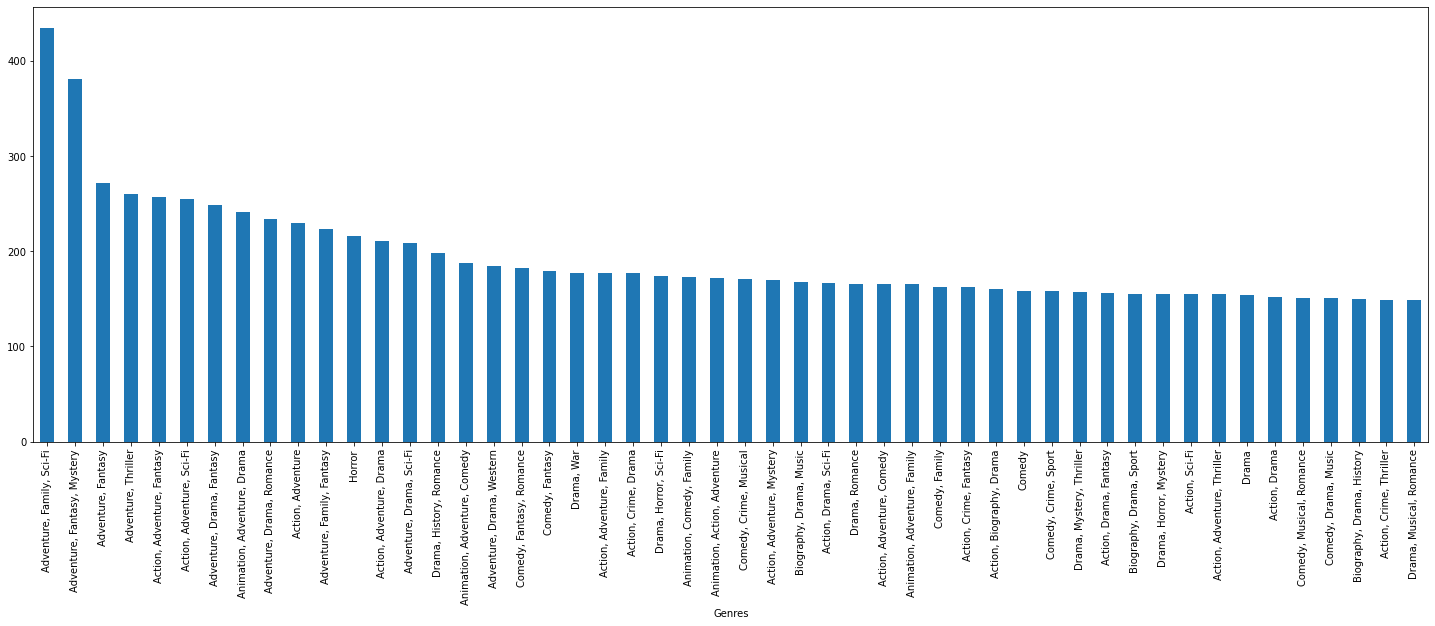

In [9]:
# Because we want to avoid counting them multiple times, we decided that was better to use all genres assigned to a movie.
# With that we choose the top 50 highest grossing genre grouppings, which can be seen in our regression as having 2-3 
# dummy variables with value 1 and the rest 0. (don't know if necessary to explain that, but that's my opinion).

plot9 = (
    df.groupby("Genres")["GrossRevenue"]
    .mean()
    .sort_values(ascending=False)[:50]
    .plot.bar(figsize=(25, 8))
)
plot9.set(xlabel="Genre Combination", ylabel="Average Domestic Gross Revenue (in Millions of $)",
         title="Relation between genres and average domestic revenue")

In [10]:
# In that we can see that even though Action is a genre in approximately 41-42%, it doesn't figure in the top 3 genre groups
# by highest grossing. This chart fits the regression, given that the best combination can't happen, "Adventure, Sci-Fi, Fantasy",
# as Sci-Fi and Fantasy are completely unrelated and Adventure is in majority of the genres groups as we have previously said.

In [11]:
# I think there is enough time, but if we need more material, we can use the regression made in "decade_analysis.csv" 
# and with it we can use the charts bellow to vizualize the values:

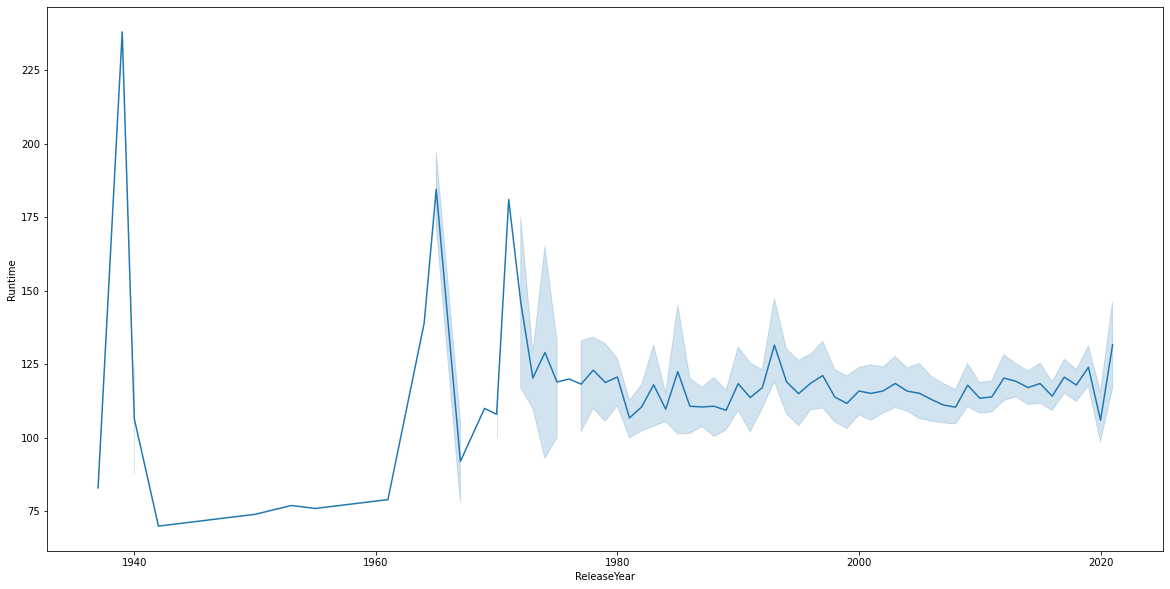

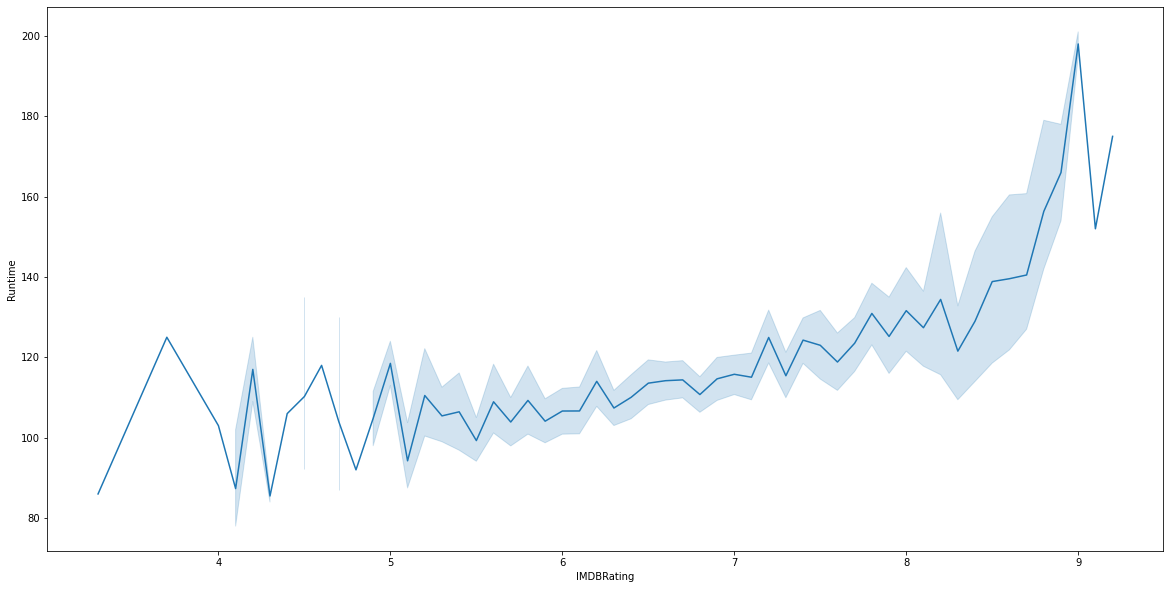

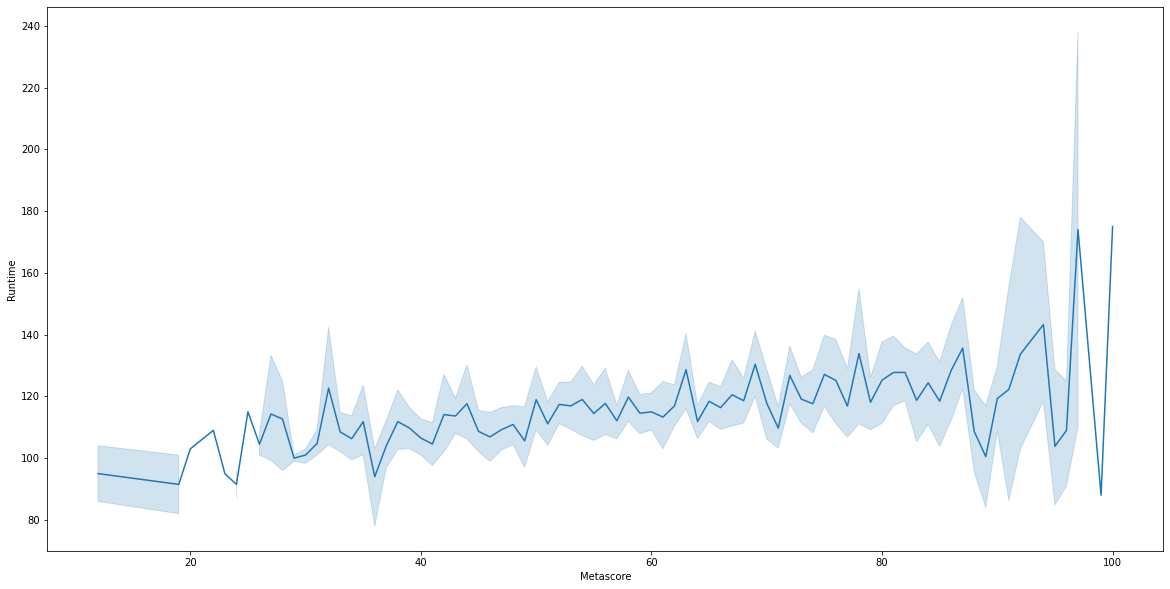

In [17]:
plt.figure(figsize=(20, 10))
plot10 = sns.lineplot(data=df, x="ReleaseYear", y="Runtime")

plt.figure(figsize=(20, 10))
plot11 = sns.lineplot(data=df, x="IMDBRating", y="Runtime")

plt.figure(figsize=(20, 10))
plot12 = sns.lineplot(data=df, x="Metascore", y="Runtime")